In [46]:
import string
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk import  word_tokenize
from gensim.models import Word2Vec as w2v
from sklearn.decomposition import PCA
from nltk.stem import WordNetLemmatizer


In [47]:
nltk.download('all')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/kimberly/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/kimberly/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/kimberly/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/kimberly/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/kimberly/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading pa

In [48]:
df = "shakespeare.txt"
sw = stopwords.words("english")
plt.style.use("ggplot")

reading the text file

In [49]:
txt = []
with open(df, 'r') as f:
    for text in f:
        txt.append(text)

cleaning the text files

In [50]:
#removing new lines from the txt
lines = [line.rstrip('\n') for line in txt]
#converting text to lower case letter
lines = [line.lower() for line in txt]
#removing punctuation marks
lines = [line.translate(str.maketrans("", "", string.punctuation)) for line in txt]

lines = [word_tokenize(line) for line in txt]

function for removing stopwords

In [51]:
def removing_stops(txt: str, sw = sw) -> str:
    lst = []
    for char in txt:
        original_word = char
        char = [word for word in char if word in sw]
        if len(char) < 1:
            char = original_word
        lst.append(char)
    return lst
filter_line = removing_stops(lines, sw = sw)

Embedding the model

In [52]:
model = w2v(filter_line, min_count=3, sg=1, window=7)
model.wv.most_similar("thou")

[('What', 0.9580731987953186),
 ('art', 0.9427335262298584),
 ('My', 0.9092615246772766),
 ('lord', 0.9039328694343567),
 ('dost', 0.8970105648040771),
 ('hast', 0.8844342827796936),
 ('thy', 0.8821032643318176),
 ('Why', 0.8782414793968201),
 ('Thou', 0.8774325847625732),
 ('How', 0.8705665469169617)]

converting words to dataframe

In [53]:
embedded_word = (pd.DataFrame([model.wv.get_vector(str(n))for n in model.wv.key_to_index],
index = model.wv.key_to_index))

In [54]:
model.wv.most_similar("art")

[('dost', 0.9883511662483215),
 ('hast', 0.9838272333145142),
 ('lord', 0.9795578122138977),
 ('sayest', 0.9780009984970093),
 ('What', 0.9737329483032227),
 ("is't", 0.9713647365570068),
 ('wouldst', 0.97077476978302),
 ('dear', 0.9682674407958984),
 ('done', 0.9670078158378601),
 ('wilt', 0.9653579592704773)]

PCA embeddings

In [55]:
pca = PCA(n_components=2, random_state=7)
pca_model = pca.fit_transform(embedded_word)

In [56]:
embedded_pca = (pd.DataFrame(pca_model, columns=['X', "Y"], index=embedded_word.index))

[]

<Figure size 432x288 with 0 Axes>

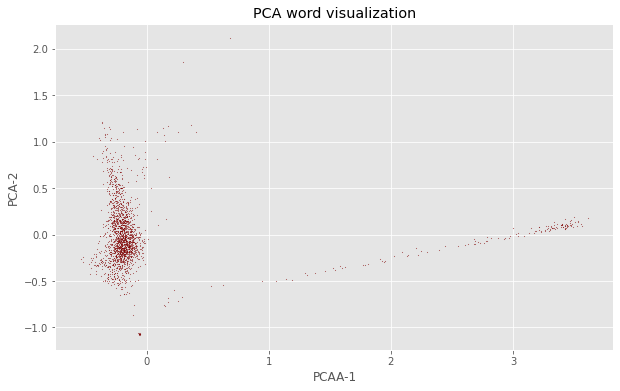

In [57]:
plt.clf()
fig = plt.figure(figsize=(10, 6))
plt.scatter(x = embedded_pca["X"],y = embedded_pca["Y"], s = 0.4, color = "maroon", alpha = 0.5)
plt.xlabel("PCAA-1")
plt.ylabel("PCA-2")
plt.title("PCA word visualization")
plt.plot()